
# N0 configuration with PML

Trying to add exacty PML.  At the moment debugging.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from scipy.linalg import null_space

importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [4]:
ts = [4.0775e-05, 2e-5, 1e-5]
rhos =[sum(ts[:i]) for i in range(1, len(ts)+1)]
mats = ['air', 'glass', 'glass']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_glass]
maxhs = [.1,.03, .02]
pml = {'alpha':.1, 'R0':rhos[-2]}

In [5]:
A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=7.2e-6)


In [6]:
A.rhos/A.scale

array([2.71833333, 4.05166667, 4.71833333])

In [7]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

13.093597536773284

In [8]:
outer = 'pcb'
nu = 1

In [9]:
A.determinant([[.999*k_low, .999*k_low],[.999*k_low, .999*k_low]] , nu=nu, outer=outer, pml=pml)

array([[-1.39379898+1.41652544j, -1.39379898+1.41652544j],
       [-1.39379898+1.41652544j, -1.39379898+1.41652544j]])

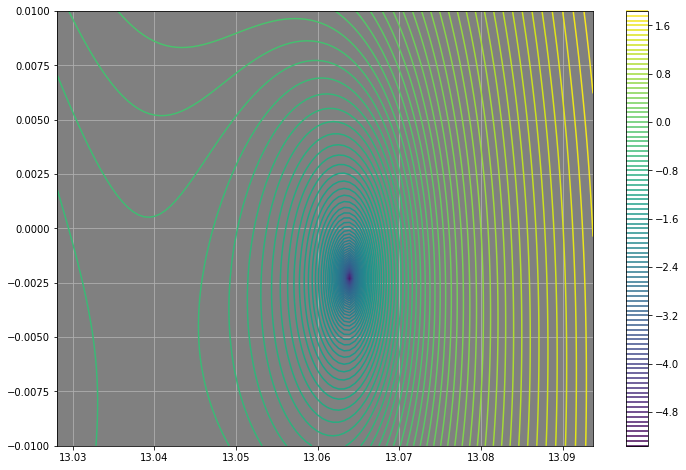

In [10]:
plotlogf(A.determinant, .995*k_low, 1.00001*k_low, -.01,.01, nu, outer, pml,
         iref=100, rref=100, levels=100)

In [11]:
guess = np.array(.9995 * k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, pml), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, pml)))


Scaled beta:  (13.063869564192029-0.0022612245766995337j) . Residual of determinant:  7.860661269369427e-15


Get coeffs and K for checking.

# Bragg Exact Fields

In [12]:
Fs = A.all_fields(beta1, nu, outer, pml)

In [13]:
Draw(1e1*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [14]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [15]:
Draw(Fs['Er'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Etv'].imag, A.mesh)

In [ ]:
Draw(1e1*Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)